In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df = pd.read_csv("train.csv")

In [3]:
data = df.copy()

In [4]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
data.shape

(381109, 12)

#### Checking Duplicates in dataset

In [18]:
data.duplicated().sum()

0

#### checking Null Values

In [43]:
data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### Checking data types

In [22]:
data.sample(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
215500,215501,Female,52,1,28.0,0,1-2 Year,Yes,35472.0,124.0,275,1
354980,354981,Female,39,1,28.0,0,> 2 Years,Yes,37358.0,25.0,224,1


In [21]:
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [26]:
data.dtypes[data.dtypes == 'int64']

id                    int64
Age                   int64
Driving_License       int64
Previously_Insured    int64
Vintage               int64
Response              int64
dtype: object

**Summary**
- id is unique number so correctly identified as int
- Age too is given in whole numbber so no need to change the type
- **Driving_License** is 0 or 1 meaning if one has a license or not, **should be changed to category**
- **Previously_Insured** is also 0 or 1 , whether customer has previously had insurance , **should be converted in category**
- Vintage is Number of days the customer has been associated with company , so datatype is fine.
- **Response** is 1 or 0 on basis of whether the customer would agree for vehicle insurance or not , so **should be converted to category**

In [28]:
data['Driving_License'] = data['Driving_License'].astype('category')
data['Previously_Insured'] = data['Previously_Insured'].astype('category')
data['Response'] = data['Response'].astype('category')

In [29]:
data.dtypes[data.dtypes == 'int64']

id         int64
Age        int64
Vintage    int64
dtype: object

In [30]:
data.dtypes[data.dtypes == 'float64']

Region_Code             float64
Annual_Premium          float64
Policy_Sales_Channel    float64
dtype: object

In [33]:
data.Region_Code.unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

In [39]:
data["Annual_Premium"].nunique

<bound method IndexOpsMixin.nunique of 0         40454.0
1         33536.0
2         38294.0
3         28619.0
4         27496.0
           ...   
381104    30170.0
381105    40016.0
381106    35118.0
381107    44617.0
381108    41777.0
Name: Annual_Premium, Length: 381109, dtype: float64>

In [35]:
data["Policy_Sales_Channel"].unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

**Summary**
- **Region_code** unquely defines the region of customer so can be **converted in int64** as their is no decimal value in any value
- Annual_Premium is the amount customer needs to pay as premium in the year , we have no decimal value here but might have in test set , so float64
- **Policy_Sales_Channel** is Code for the channel of outreaching to the customer , and has no decimal value so **convert to int64**

In [40]:
data['Region_Code'] = data['Region_Code'].astype('int64')
data['Policy_Sales_Channel'] = data['Policy_Sales_Channel'].astype('int64')

In [25]:
data['Gender'] = data['Gender'].astype('category')
data['Vehicle_Age'] = data['Vehicle_Age'].astype('category')
data['Vehicle_Damage'] = data['Vehicle_Damage'].astype('category')

In [42]:
data.dtypes

id                         int64
Gender                  category
Age                        int64
Driving_License         category
Region_Code                int64
Previously_Insured      category
Vehicle_Age             category
Vehicle_Damage          category
Annual_Premium           float64
Policy_Sales_Channel       int64
Vintage                    int64
Response                category
dtype: object

## ANALYSIS

#### Univariate Analysis: Numerical Variables

In [46]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

id                        int64
Age                       int64
Region_Code               int64
Annual_Premium          float64
Policy_Sales_Channel      int64
Vintage                   int64
dtype: object

#### Function for Box ,KDE , Log_transformed KDE and Log_Modulus KDE plot

In [47]:
def plot_num(feature):
    mini = data[feature].min()
    maxi = data[feature].max()
    ran = data[feature].max()-data[feature].min()
    mean = data[feature].mean()
    skew = data[feature].skew()
    kurt = data[feature].kurtosis()
    median = data[feature].median()
    st_dev = data[feature].std()
    points = mean-st_dev, mean+st_dev
    
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=data,x=feature,ax=axes[0])
    sns.distplot(a=data[feature],ax=axes[1],color='#ff4125')
    
    fig.set_size_inches(15,5)
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),round(kurt,2),round(skew,2),(round(mini,2),round(maxi,2),round(ran,2)),round(mean,2),round(median,2)))


In [50]:
def plot_num_log(feature):
    sns.distplot(np.log(data[feature].values), bins=25, kde=True)

In [48]:
def log_mod(y):
    sns.distplot(np.sign(y)*(np.log(abs(y) + 1)), hist = False, kde = True,kde_kws = {'shade': True})

- ID

In [45]:
data.id.duplicated().sum()

0

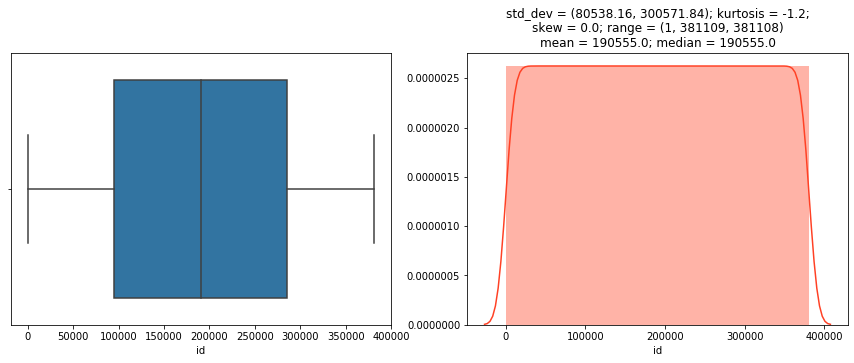

In [78]:
plot_num("id")

- Age

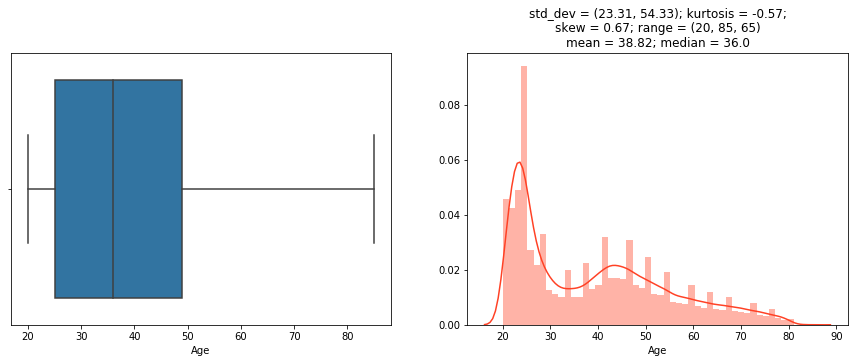

In [55]:
plot_num("Age")

- People from 20-30 tend to have the highest number of health insurance already , chances are they fell ill less as less age so accidents
>- Hypothesis - 20-30 might take insurance more
- Overall . 20- 50 have more health insurrance 
>- Hypothesis - They would take vehicle Insurance

### New_Feature 
- Make new Column for Age Binning to categorize people on Age basis.

In [58]:
data["Age"].min() , data["Age"].max()

(20, 85)

In [59]:
bins = [19 , 33 , 50 , 65 , 86]
labels = ["Young" , "Adult" , "Mature" , "Old"]
data["Age_Bin"] = pd.cut(data['Age'], bins, labels = labels, include_lowest = True)

#### Back to analysis

- Region_Code

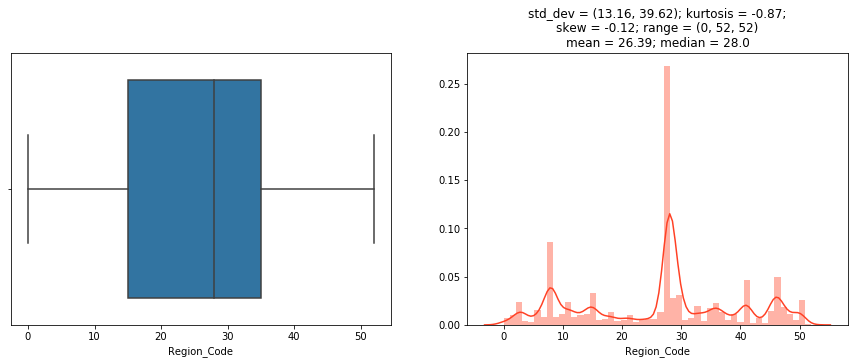

In [62]:
plot_num("Region_Code")

- Why more frequency near area 30?
>- More accidents?? Can be checked with Vehicle_Damage
>- If yes, Hypothesis -- More applied for vehicle insurance

- Annual_Premium (Annual Premium payment to be paid)

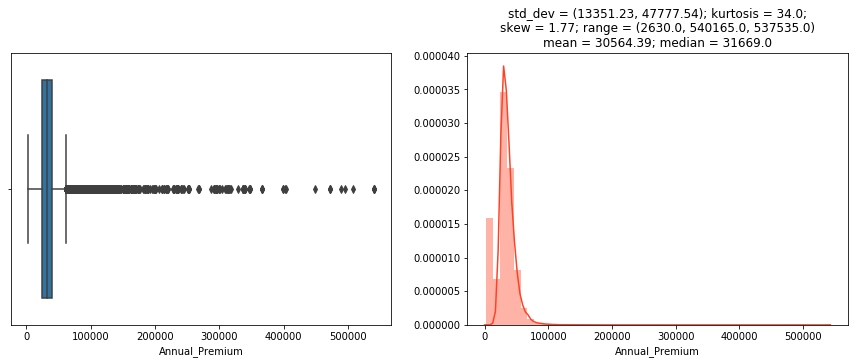

In [63]:
plot_num("Annual_Premium")

- SInce less premium amount to be paid this year is majority
>- May not accept vehicle Insurance
>- But do check t=with age in this and vehicle damage
- The high Insurance Payment ones
>- If very old , might not accept Vehicle Insurance 
>- If more vehicle damage, then would

- Policy_Sales_Channel (Anoymous Code for how the policy was introduced)
>- Different Agents, Over Mail, Over Phone, In Person, etc.

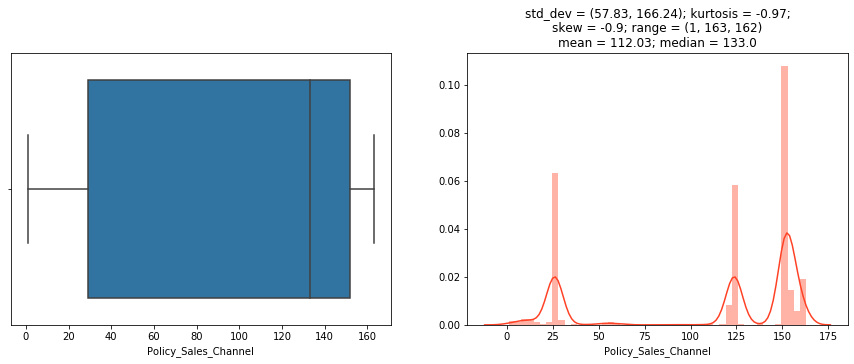

In [64]:
plot_num("Policy_Sales_Channel")

- The codes are definitely anoymous , but the ones with high peaks can be binned for over phone or mail or personally or via agents and etc
>- But Definitely increasin after 120 channel code. 
>- Hypothesis -- More poeple interested who interacted with channel over 120

#### New Feature from Policy_Sales_Channel

In [70]:
bins = [0 , 20 , 35 , 70 , 120 , 145 , 165]
labels = ["Agents" , "Phone" , "agents" ,"Etc", "Mail" , "Personally"]
data["Policy_Sales_Channel_Bin"] = pd.cut(data['Policy_Sales_Channel'], bins=bins, labels = labels, include_lowest = True)

#### Back to Analysis

- Vintage (Number of Days, Customer has been associated with the company)

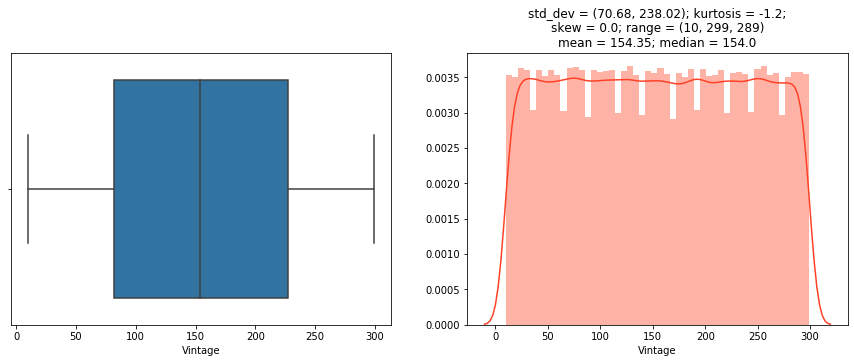

In [72]:
plot_num("Vintage")

# ???

In [101]:
### Univariate Categorical Variable

In [73]:
# Category datatypes
data.select_dtypes(include=['category']).dtypes

Gender                      category
Driving_License             category
Previously_Insured          category
Vehicle_Age                 category
Vehicle_Damage              category
Response                    category
Age_Bin                     category
Policy_Sales_Channel_Bin    category
dtype: object

####  Defining function for Bar plot and getting value_counts for categories in columns

In [75]:
def plot_cat(feature):
    sns.countplot(data=data,x=feature)

In [81]:
def value(x):
    for i in data[x].unique():
        y = data[data[x] == i] 
        print(i ,(y.shape[0] / data.shape[0])*100)

- Gender

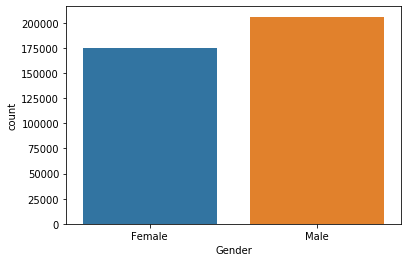

In [79]:
plot_cat("Gender")

- Females are less in number 
>- Hypothesis - Females may accept more vehicle insurance due to more accidents maybe

- Driving_License (0 : Customer does not have DL, 1 : Customer already has DL)

1 99.78693759528115
0 0.21306240471885995


Text(0.5, 1.0, 'Driving_License None')

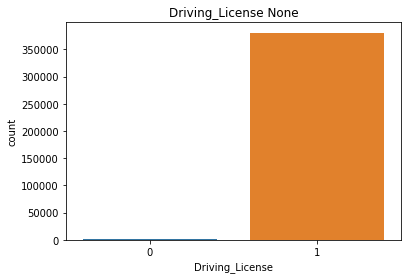

In [82]:
plot_cat("Driving_License")
plt.title("Driving_License {}".format(value("Driving_License"))) 

- customers with no driivng license are way too less

- Previously_Insured (1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have)

0 54.17898816349128
1 45.82101183650871


Text(0.5, 1.0, 'Do they laready have insurance None')

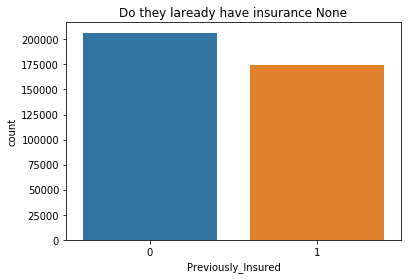

In [85]:
plot_cat("Previously_Insured")
plt.title("Do they laready have insurance {}".format(value("Previously_Insured")))

- 45% of them already have vehicle insurace previously 
>- Hypothesis - Might agree faster with slowest mode of communication of policy for vehicle insurace

- Vehicle_Age

> 2 Years 4.200110729476344
1-2 Year 52.56134071879699
< 1 Year 43.238548551726666


Text(0.5, 1.0, 'Vehicle_Age None')

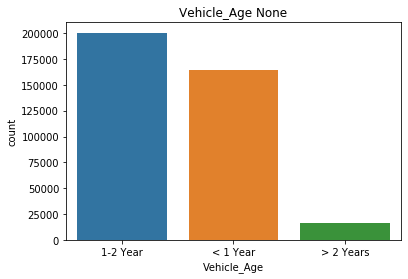

In [88]:
plot_cat("Vehicle_Age")
plt.title("Vehicle_Age {}".format(value("Vehicle_Age")))

- Nwly brought vehicle ( < 1 year) might have insurance from company itself
>- hypothesis - wont agree for insurance
- 1-2 years might agree faster because new vehicle and dont want to spend on damages

- Vehicle_Damage (1 : Customer got his/her vehicle damaged in the past. , 0 : Customer didn't get his/her vehicle damaged in the past.)

Yes 50.48765576252463
No 49.51234423747537


Text(0.5, 1.0, 'Was vehicle damaged previously? None')

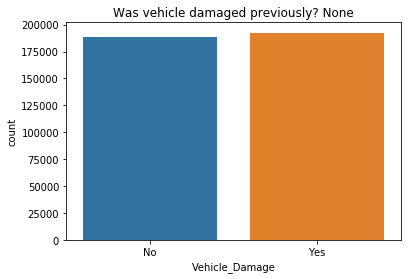

In [89]:
plot_cat("Vehicle_Damage")
plt.title("Was vehicle damaged previously? {}".format(value("Vehicle_Damage")))

- Half of the customers have damaged vehicles
>- do check for AGe of vehicle and damage ratio
>- Hypothesis - Damaged one would agree more

- Age_Bin

Adult 30.328331264808757
Old 7.365084529622759
Young 46.43842050437014
Mature 15.868163701198345


Text(0.5, 1.0, 'Percentage of age binned None')

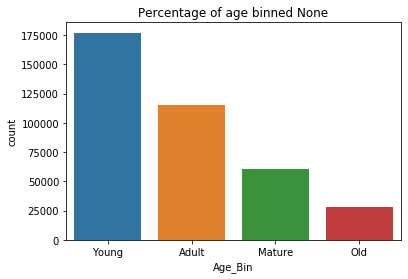

In [94]:
plot_cat("Age_Bin")
plt.title("Percentage of age binned {}".format(value("Age_Bin")) )

- Policy_Sales_Channel	(Anonymised Code for the channel of outreaching to the customer)

Phone 22.616101955083717
Personally 49.763453500179736
Mail 22.68537347582975
Agents 3.1421456853551084
agents 1.2096276918152025
Etc 0.5832976917364848


Text(0.5, 1.0, 'Communication Mode for policy intro None')

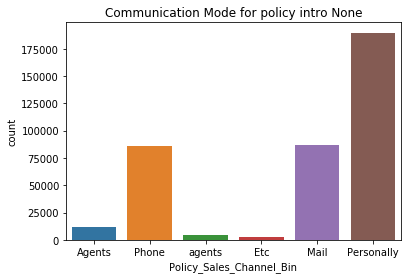

In [95]:
plot_cat("Policy_Sales_Channel_Bin")
plt.title("Communication Mode for policy intro {}".format(value("Policy_Sales_Channel_Bin")))

In [97]:
c= {"Agents":"Agents" , "agents":"Agents" , "Phone":"Phone" , "Mail":"Mail" , "Personally": "Personally" , "Etc" :"Etc"}
data['Policy_Sales_Channel_Bin'] = data['Policy_Sales_Channel_Bin'].map(c)

Phone 22.616101955083717
Personally 49.763453500179736
Mail 22.68537347582975
Agents 4.351773377170311
Etc 0.5832976917364848


Text(0.5, 1.0, 'Communication Mode for policy intro \nNone')

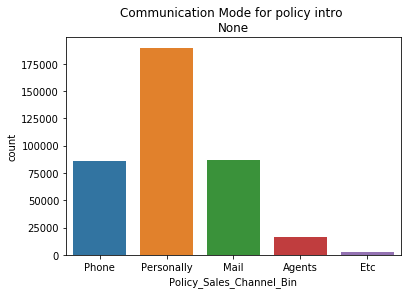

In [100]:
plot_cat("Policy_Sales_Channel_Bin")
plt.title("Communication Mode for policy intro \n{}".format(value("Policy_Sales_Channel_Bin")))

- Hypo -- Personally would result better in getting pople interested for insurance

- Response (1 :  Customer is interested, 0 : Customer is not interested)

1 12.256336113815209
0 87.74366388618479


Text(0.5, 1.0, 'How many were posiitve responses? None')

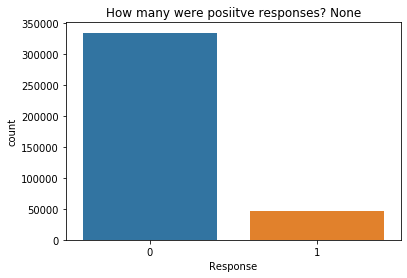

In [92]:
plot_cat("Response")
plt.title("How many were posiitve responses? {}".format(value("Response")))

- Only 12 % are interested/agreed for vehicle insurance 

## Bivariate

- Numerical - Numerical
- Numerical - categorical
- Categorical - Categorical

#### Bivariate (Numerical-Categorical)

 - Hypothesis to check from univariate 

- Age
>- 20-30 might take insurance more
>- 30-50 would take vehicle Insurance

- Region_Code
>- more near 30
>- More accidents?? Can be checked with Vehicle_Damage
>- If yes, Hypothesis -- More applied for vehicle insurance

- Annual_Premium
>- SInce less premium amount to be paid this year is majority
>- May not accept vehicle Insurance
>- But do check t=with age in this and vehicle damage
>- The high Insurance Payment ones
>- If very old , might not accept Vehicle Insurance 
>- If more vehicle damage, then would

- Policy_Sales_Channel
>- Hypothesis -- More poeple interested who interacted with channel over 120
- Vintage                   
>- ??

#### Defining Function with t and z test results

In [106]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [107]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  